# Reprojecting and Clipping

Will learn
- How to change the CRS of a gdp.GeoDataFrame
- How to clip different geometries using polygons

## Data
- TIGER
- Natural Earth's simple populated places
- Roads data


In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from shapely.geometry import box

pd.set_option("display.max.columns", None)

## Import data

In [35]:
states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')
states.columns = states.columns.str.lower()

places = gpd.read_file('data/ne_50m/ne_50m_populated_places_simple.shp')

roads = gpd.read_file('data/roads/ne_10m_roads.shp')

## Data selection
Want to plot Alaska

<AxesSubplot:>

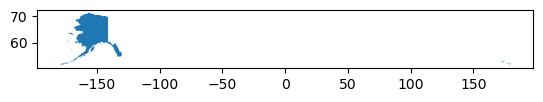

In [15]:
alaska = states[states.name == 'Alaska']
alaska.plot()

## Reprojecting

**Reprojection**
Changing CRS of geospatial data

Use `to_crs` 

<AxesSubplot:>

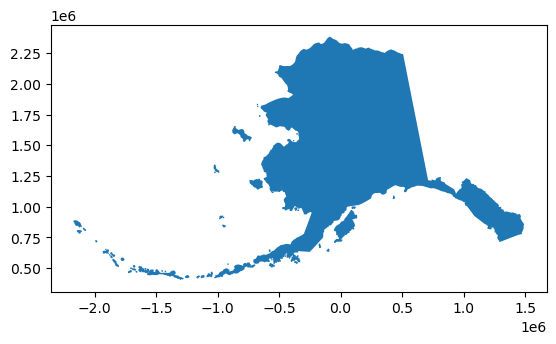

In [17]:
alaska = alaska.to_crs('epsg:3338')

alaska.plot()

## Prepare populated places

In [21]:
places.head

<bound method NDFrame.head of       scalerank  natscale  labelrank              featurecla            name  \
0            10         1          5  Admin-1 region capital           Bombo   
1            10         1          5  Admin-1 region capital     Fort Portal   
2            10         1          3  Admin-1 region capital         Potenza   
3            10         1          3  Admin-1 region capital      Campobasso   
4            10         1          3  Admin-1 region capital           Aosta   
...         ...       ...        ...                     ...             ...   
1246          0       600          1         Admin-1 capital  Rio de Janeiro   
1247          0       600          1         Admin-1 capital       São Paulo   
1248          0       600          3         Admin-1 capital          Sydney   
1249          0       600          0         Admin-0 capital       Singapore   
1250          0       600          0  Admin-0 region capital       Hong Kong   

     name

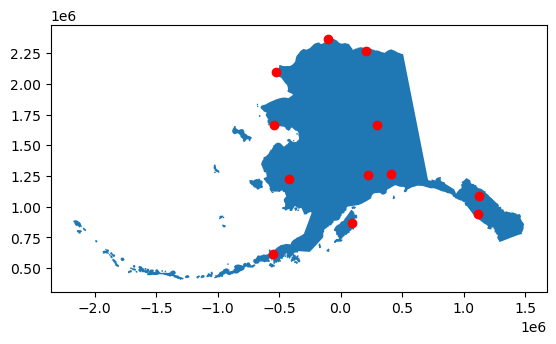

In [33]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_places.plot(ax=ax, color ='red')

plt.show()

<AxesSubplot:>

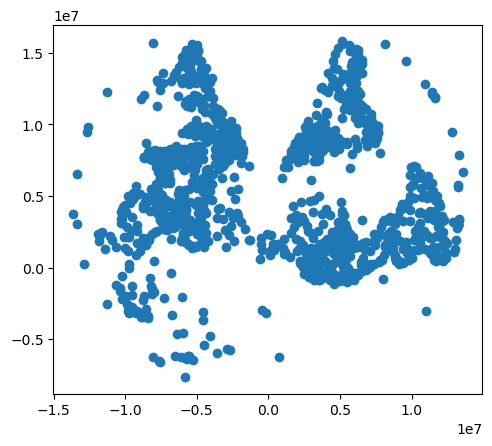

In [29]:
places = places.to_crs(alaska.crs)

places.plot()

## Clipping
means using a polygon(s) to only select geospatial data w/in those polygon(s)

<AxesSubplot:>

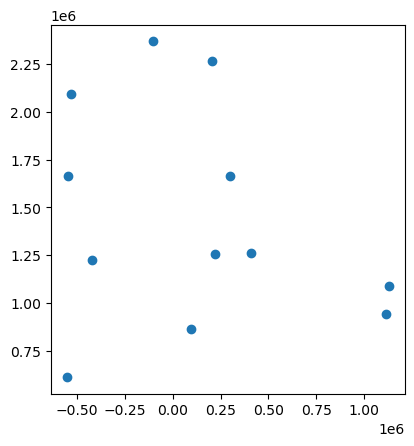

In [31]:
ak_places = gpd.clip(places, alaska)

## Prepare roads

In [43]:
roads.head(3)


,geometry
0,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


In [ ]:
usa_roads = roads[roads.sov_a3 == 'USA']

usa_roads.plot()